In [ ]:
#classify handwritten digits using a simple  neural network which has only input and output layers
#we will then add a hidden layer and see how the performance of the model improves

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
#load handwritten digits dataset

(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()


In [ ]:
len(x_train)

60000

In [ ]:

len(x_test)

10000

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

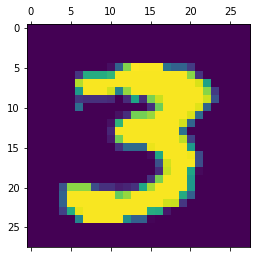

In [ ]:
plt.matshow(x_train[27])

In [ ]:
y_train[27]

3

In [ ]:
#89SCALING ---- IT IS THE TECHNIQUE WHICH IMPROVES THE ACCURACY OF MACHINE LEARNING MODELS

x_train=x_train / 255
x_test=x_test / 255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [ ]:
x_train_flattened.shape

(60000, 784)

In [ ]:
# CREATE SIMPLE NEURAL NETWORK
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
# OPTIMIZER ALLOWS YOU TO TRQIN EFFICIENTLY.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4708 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9261


In [ ]:
# evaluating accuracy on a set dataset

model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2676 - accuracy: 0.9262


[0.26761412620544434, 0.9261999726295471]

In [ ]:
#sample prediction and it will give the prediction of 10 classes
y_predicted=model.predict(x_test_flattened)
y_predicted[27]

313/313 [==============================] - 1s 3ms/step


array([1.19261490e-02, 1.30878825e-05, 3.45043577e-02, 1.06744133e-02,
       9.96917307e-01, 1.77458838e-01, 6.30822480e-02, 3.59851196e-02,
       2.00220779e-01, 8.25709403e-01], dtype=float32)

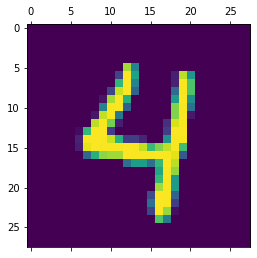

In [ ]:
plt.matshow(x_test[27])

In [ ]:
# np.argmax finds a maximum element from an array and returns the index of it

np.argmax(y_predicted[27])

4

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [ ]:
# it shows the values from the first 5 indexes
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   8,    7,  936,   11,    8,    5,   11,    8,   34,    4],
       [   4,    0,   23,  911,    0,   35,    2,    9,   17,    9],
       [   2,    1,    5,    1,  910,    0,    9,    4,    9,   41],
       [  10,    1,    5,   22,    8,  797,   11,    5,   26,    7],
       [  13,    3,    8,    1,    7,   14,  909,    2,    1,    0],
       [   1,    5,   25,    7,    7,    1,    0,  945,    2,   35],
       [  10,    6,    6,   23,    9,   38,   10,   10,  855,    7],
       [  11,    6,    1,    9,   23,    9,    0,   21,    5,  924]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

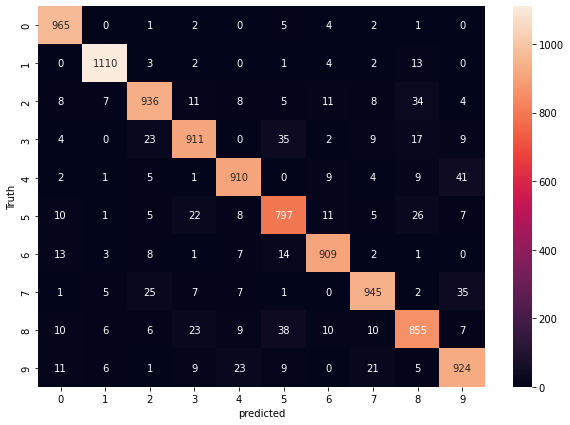

In [ ]:
# visualizing the cnfusion matrix

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True , fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
# using hidden layers

model=keras.Sequential([
   
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2689 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1209 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0838 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0632 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0510 - accuracy: 0.9847


In [ ]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9760


[0.07541979849338531, 0.9760000109672546]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

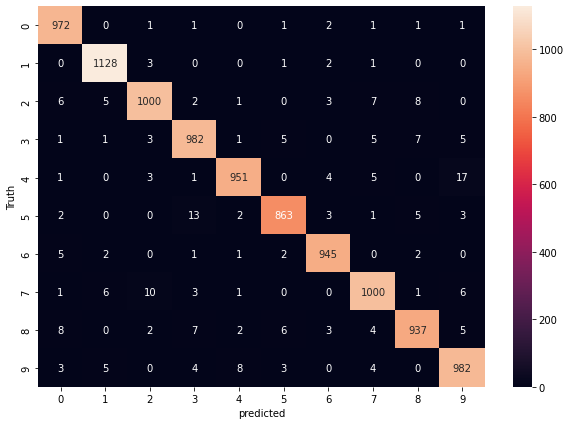

In [ ]:
y_predicted=model.predict(x_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel("Truth")

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2737 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1206 - accuracy: 0.9648
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0849 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0630 - accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0498 - accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0328 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0278 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.9776


[0.08100803196430206, 0.9775999784469604]

In [ ]:
# task:- use different loss functions by refering the site---tensorflow loss functions.

In [ ]:
x_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
type(x_test_flattened)

numpy.ndarray

In [ ]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)